<a href="https://colab.research.google.com/github/BayMx19/FaceRecognition-Python/blob/main/FACE_BISAAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from PIL import Image
from keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers, regularizers
import cv2
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fer2013.zip to fer2013.zip
User uploaded file "fer2013.zip" with length 63252113 bytes


In [4]:
from zipfile import ZipFile
file_name = "fer2013.zip"

with ZipFile(file_name, 'r') as zipObj:
  zipObj.extractall()
  print("Selesai Extract")

Selesai Extract


In [5]:
train_path = 'train'
val_path = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

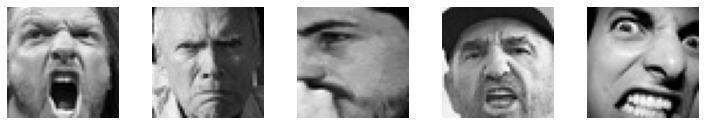

In [7]:
plot_images('train/angry')

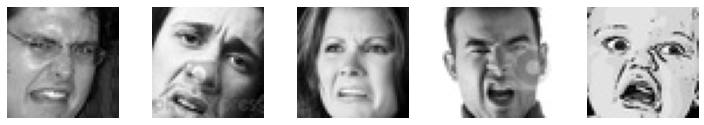

In [8]:
plot_images('train/disgust')

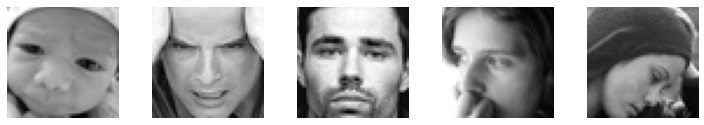

In [9]:
plot_images('train/fear')

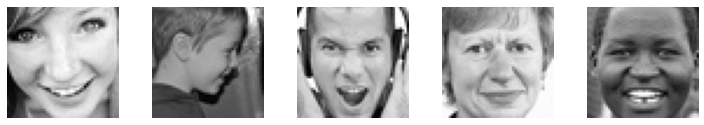

In [10]:
plot_images('train/happy')

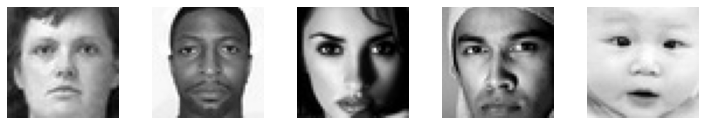

In [11]:
plot_images('train/neutral')

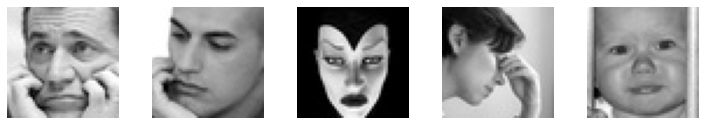

In [12]:
plot_images('train/sad')

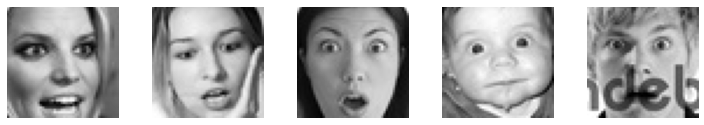

In [13]:
plot_images('train/surprise')

In [14]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [15]:
def plot_bar_chart_diagram(path_data):
  dic={}
  for emotion in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+emotion):
      dem+=1
    dic[emotion]=dem
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
#set color
  plt.show()

{'neutral': 4965, 'disgust': 436, 'happy': 7215, 'angry': 3995, 'sad': 4830, 'fear': 4097, 'surprise': 3171}


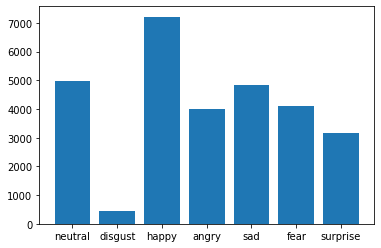

In [16]:
plot_bar_chart_diagram('train')

{'neutral': 1233, 'disgust': 111, 'happy': 1774, 'angry': 958, 'sad': 1247, 'fear': 1024, 'surprise': 831}


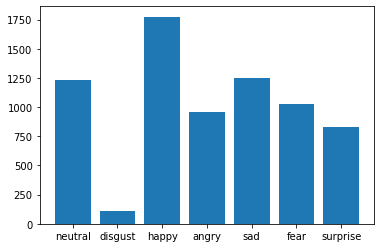

In [17]:
plot_bar_chart_diagram('test')  

In [18]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [19]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [20]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-20-262a6af64eb7>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


448/448 [==============================] - 22s 28ms/step - loss: 1.7997 - accuracy: 0.2625 - val_loss: 1.6916 - val_accuracy: 0.3511
Epoch 2/50
448/448 [==============================] - 12s 27ms/step - loss: 1.6269 - accuracy: 0.3668 - val_loss: 1.5448 - val_accuracy: 0.4174
Epoch 3/50
448/448 [==============================] - 12s 27ms/step - loss: 1.5345 - accuracy: 0.4118 - val_loss: 1.4678 - val_accuracy: 0.4365
Epoch 4/50
448/448 [==============================] - 12s 27ms/step - loss: 1.4695 - accuracy: 0.4369 - val_loss: 1.4168 - val_accuracy: 0.4667
Epoch 5/50
448/448 [==============================] - 12s 27ms/step - loss: 1.4139 - accuracy: 0.4614 - val_loss: 1.3723 - val_accuracy: 0.4780
Epoch 6/50
448/448 [==============================] - 12s 27ms/step - loss: 1.3651 - accuracy: 0.4826 - val_loss: 1.3463 - val_accuracy: 0.4953
Epoch 7/50
448/448 [==============================] - 12s 27ms/step - loss: 1.3194 - accuracy: 0.4988 - val_loss: 1.2968 - val_accuracy: 0.5124
Epo

In [21]:
batch_size = 34
target_size = (124,124)

train_datagen = ImageDataGenerator(rescale=1./255.0,
                                   validation_split=0.2,
                                   zoom_range=[0.8,1.5],
                                  horizontal_flip=True,
                                   shear_range=10,
                                   brightness_range=[0.2,2.0],
                                   rotation_range=45
                                  )
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        'test',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [22]:
input_shape = (128,128,3) # img_rows, img_colums, color_channels
num_classes = 7

In [23]:
import tensorflow as tf
Xception=tf.keras.applications.InceptionResNetV2(weights='imagenet',input_shape=input_shape, include_top=False)
# for layer in MobileNetV3.layers:
#     layer.trainable = False
# Build Model
model = models.Sequential()
# load the model
model.add(Xception)

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.75))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

219055592/219055592 [==============================] - 11s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 2, 2, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 6144)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              6292480   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)            

In [24]:

plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam( learning_rate=0.0001), metrics=['accuracy'],) 

In [25]:
emotion_model.save('emotion_model.h5')

In [26]:
from keras.models import load_model
emotion_model = load_model('emotion_model.h5')

In [27]:
# Evaluate Model
score = model.evaluate_generator(val_generator) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

<ipython-input-27-3fe3e22d333f>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(val_generator)


Test loss:  3.1997668743133545
Test accuracy:  0.0564224012196064


In [28]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [29]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [40]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

Hasil

OpenCV(4.6.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

1/1 [==============================] - 0s 17ms/step


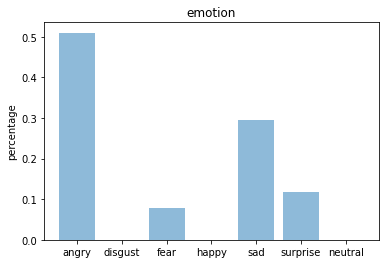

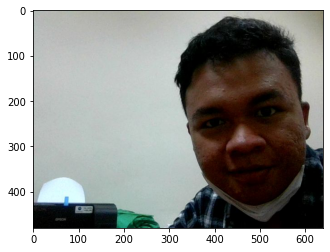

In [41]:
import cv2
            
def facecrop(image):  
    facedata = '/content/haarscascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)

    except Exception as e:
        print (e)

   


if __name__ == '__main__':
    facecrop('/content/photo.jpg')

import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


import numpy as np
import matplotlib.pyplot as plt


file = '/content/photo.jpg'
true_image = keras.utils.load_img(file)
img = keras.utils.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()